In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Giovanni Janzante Gianini - RM 95306

Ferdinand Farah Prezotto Neto - RM 95487

Henry Andrés Garrido de Vilar - RM 94157

In [2]:
df = pd.read_csv('dados_TREINO.csv')

In [3]:
df = df.dropna()

In [4]:
df_filtrado = df.loc[:, ['svcscan.nactive', 'dlllist.avg_dlls_per_proc',
                         'svcscan.process_services', 'pslist.avg_threads', 
                         'malfind.ninjections', 'ldrmodules.not_in_init', 
                         'malfind.uniqueInjections',
                         'Category', 'Class'
                         ]]

In [5]:
X = df_filtrado[['svcscan.nactive', 'dlllist.avg_dlls_per_proc', 
                 'svcscan.process_services', 'pslist.avg_threads',
                 'malfind.ninjections', 'ldrmodules.not_in_init', 
                 'malfind.uniqueInjections',]]


Y = df_filtrado["Category"]



In [6]:
X = pd.get_dummies(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [7]:
modelo = RandomForestClassifier(n_estimators=250, random_state=84).fit(X_train, Y_train)

In [8]:
Y_pred = modelo.predict(X_test)

array(['Ransomware', 'Trojan', 'Benign', ..., 'Benign', 'Spyware',
       'Spyware'], dtype=object)

In [9]:
lista = []
for indice, valor in Y_test.items():
    lista.append((valor))

In [10]:
with open("Comp.csv", "w") as arquivos:
    arquivos.write("Resposta" + "," + "Correto" + "," + "Veracidade" + "\n")


with open("Comp.csv", "a") as arquivos:
    for row1, row2 in zip(lista, Y_pred):
        if row1 == row2:
            result = "Certo"
        else:
            result = "Errado"
        arquivos.write(str(row1) + ',' + str(row2) + ',' +str(result) + '\n')



In [11]:
acc = accuracy_score(Y_test, Y_pred)

print(f"Acurácia: {round(acc, 4)*100}%")

Acurácia: 85.08%


In [12]:
count = 0
b = 0
r = 0
s = 0
t = 0

while True:
    Z = df_filtrado.sample(1)
    cate = Z['Category'].values[0]

    if cate == "Benign":
        b += 1
    elif cate == "Ransomware":
        r += 1
    elif cate == "Spyware":
        s += 1
    elif cate == "Trojan":
        t += 1

    count += 1

    if count == 5000:
        break

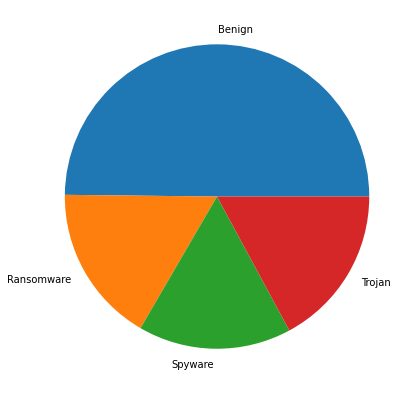

In [13]:
#Grafico de pizza baseado nos atributos escolhidos e apresentados como, Benign, Ransom, Spy e Trojan.
categ = ['Benign', 'Ransomware', 'Spyware', 'Trojan']
data = [b, r, s, t]
 
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=categ)
 
plt.show()

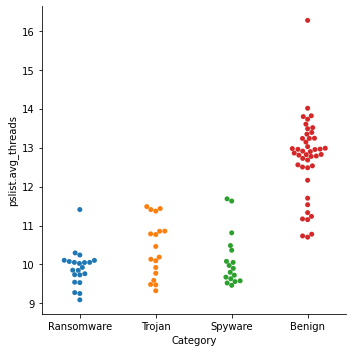

In [14]:
#Comparacao de threads utilizados pelas categorias de malware e um benign
sns.catplot(data=df_filtrado.sample(100),
            y='pslist.avg_threads',
            x='Category',
            kind='swarm'
            )

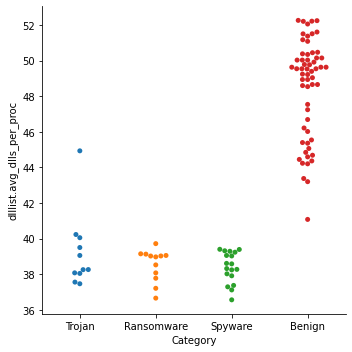

In [15]:
#Comparacao do número médio de bibliotecas carregadas por processo
#por um malware e um benign

sns.catplot(data=df_filtrado.sample(100),
            y='dlllist.avg_dlls_per_proc',
            x='Category',
            kind='swarm'
            )

<AxesSubplot:xlabel='Resposta', ylabel='count'>

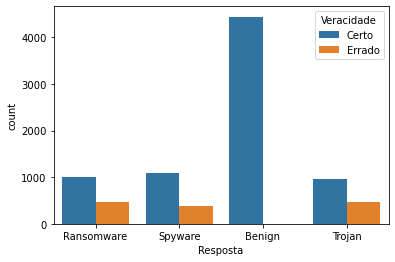

In [17]:
cmp = pd.read_csv('Comp.csv')

sns.countplot( data=cmp, x='Resposta', hue='Veracidade')